In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from sklearn.metrics import mean_squared_error

In [24]:
# Load the forward prediction model
forward_model = tf.keras.models.load_model("../models/80_neurons_1_layers_64_Batch_Size.keras")

In [25]:
# Load the backward prediction model
back_model = tf.keras.models.load_model("initial_backward_pred.keras")

In [26]:
def eval(pred, true):
    assert len(pred) != len(true)
    count = 0
    for i in range(pred.shape[0]):
        if pred[i].all() != true[i].all():
            count += 1
    return count

In [27]:
def convert_to_seq(arr):
    result = []
    error = 0
    for i in range(0, len(arr), 4):
        result.append(arr[i:i+4])
        for j in range(4):
            error += abs(arr[i+j] - int(arr[i+j]))

    return np.squeeze(np.array([result])), error

In [28]:
min_TX = -4.799135214
max_TX = 0

In [30]:
error = 0
count = 100
shape = 328

for i in range(count):
    input_value = random.uniform(min_TX, max_TX)
    repeated_X_test = np.repeat(input_value, shape).reshape(1, -1)
    pred_seq = back_model.predict(repeated_X_test)
    converted_seq, _ = convert_to_seq(pred_seq[0][0])
    pred_TX = forward_model.predict(np.array([converted_seq]))
    error += (input_value - pred_TX) ** 2

mse = error / count
print("Mean Squared Error: ", mse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

In [34]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

# Training parameters
learning_rate = 0.001
num_epochs = 1000

# Initialize an empty list to store errors
errors = []

for layer in back_model.layers:
    back_model.trainable = True

for epoch in range(num_epochs):
    input_value = random.uniform(min_TX, max_TX)
    
    with tf.GradientTape() as tape:
        pred_seq = back_model.predict(repeated_X_test)
        converted_seq, error = convert_to_seq(pred_seq[0][0])
        pred_TX = forward_model(np.array([converted_seq]))
        error += tf.reduce_mean(tf.square(input_value - pred_TX))
    
    gradients = tape.gradient(error, back_model.trainable_variables + forward_model.trainable_variables)
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    optimizer.apply_gradients(zip(gradients, back_model.trainable_variables + forward_model.trainable_variables))
    
    errors.append(error.numpy())  # Append error for this epoch
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {error.numpy():.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/1000, Loss: 3.8996
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Epoch 2/1000, Loss: 5.5134
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 3/1000, Loss: 1.0144
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 4/1000, Loss: 1.3539
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 5/1000, Loss: 3.9886
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Epoch 6/1000, Loss: 1.3695
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 7/1000, Loss: 1.9604
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 8/1000, Loss: 4.5083
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 9/1000, Loss: 3.3127
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 10/1000, Loss: 1.5045
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 11/1000, Loss: 3.1083
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 12/1000, Loss: 1.0594
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 13/1000, Loss: 3.7508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 14/1000, Loss: 5.9946
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Epoch 15/1000, Loss: 6.2435
1/1 ━━━━━━━━━━━━━━━

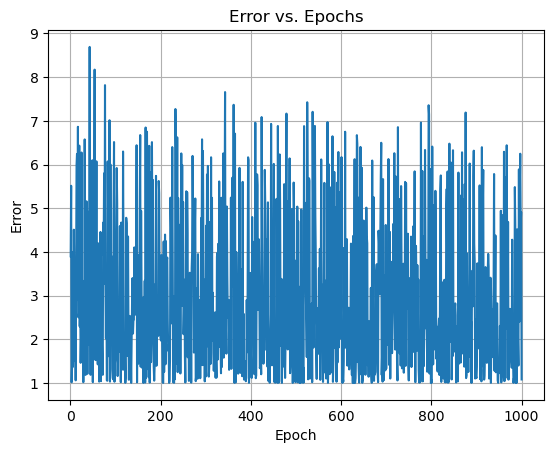

In [35]:
# Plot the error versus epochs
plt.plot(range(1, num_epochs + 1), errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.grid(True)
plt.show()

In [104]:
error = 0
count = 100

for i in range(count):
    input_value = random.uniform(min_TX, max_TX)
    pred_seq = np.round(back_model.predict(np.array([[input_value]]))).astype(int)
    converted_seq = convert_to_seq(pred_seq[0])
    pred_TX = forward_model.predict(np.array([converted_seq]))
    se = np.mean((input_value - pred_TX) ** 2)
    error += se

mse = error / count
print("Mean Squared Error: ", mse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

In [111]:
# save the model

back_model.save('trained_backward_pred.keras')